In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
#importing the data
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/cleaned_data.csv')
data.head()

,short_description,description,caller,group,char_length,word_length,short_char_length,short_word_length,description_keywords,short_description_keywords,group_code,char_length_bins,cleaned_description,cleaned_short_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,206,33,11,2,verified user details.,login issue,0,22,verified user details name checked user name a...,login issue
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,194,25,7,1,appearing in my outlook calendar,outlook,0,21,team skype appearing outlook calendar somebody...,outlook
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,87,11,18,5,log on to vpn,log in to vpn,0,10,log vpn,ca nt log vpn
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,29,5,29,5,tool page,tool page,0,3,unable access hr tool page,unable access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,12,2,12,2,skype error,skype error,0,0,skype error,skype error


#### EDA 

In [3]:
#check for variable types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8499 entries, 0 to 8498
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   short_description           8499 non-null   object
 1   description                 8499 non-null   object
 2   caller                      8499 non-null   object
 3   group                       8499 non-null   object
 4   char_length                 8499 non-null   int64 
 5   word_length                 8499 non-null   int64 
 6   short_char_length           8499 non-null   int64 
 7   short_word_length           8499 non-null   int64 
 8   description_keywords        8487 non-null   object
 9   short_description_keywords  8460 non-null   object
 10  group_code                  8499 non-null   int64 
 11  char_length_bins            8499 non-null   int64 
 12  cleaned_description         8447 non-null   object
 13  cleaned_short_description   8453 non-null   obje

In [4]:
#check for missing values
data.isnull().sum()

short_description              0
description                    0
caller                         0
group                          0
char_length                    0
word_length                    0
short_char_length              0
short_word_length              0
description_keywords          12
short_description_keywords    39
group_code                     0
char_length_bins               0
cleaned_description           52
cleaned_short_description     46
dtype: int64

In [5]:
#drop missing values
data.dropna(inplace=True,axis=0)
data.isnull().sum()

short_description             0
description                   0
caller                        0
group                         0
char_length                   0
word_length                   0
short_char_length             0
short_word_length             0
description_keywords          0
short_description_keywords    0
group_code                    0
char_length_bins              0
cleaned_description           0
cleaned_short_description     0
dtype: int64

In [6]:
#describe the variable 5 point summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
char_length,8388.0,204.285885,516.000564,3.0,42.0,106.0,201.0,13001.0
word_length,8388.0,27.407845,65.093192,1.0,6.0,11.0,28.0,1625.0
short_char_length,8388.0,47.583333,27.306519,3.0,26.0,41.0,63.0,237.0
short_word_length,8388.0,6.988913,4.132680,1.0,4.0,6.0,9.0,30.0
group_code,8388.0,16.992489,24.463570,0.0,0.0,4.0,23.0,73.0
char_length_bins,8388.0,15.727825,14.956619,0.0,5.0,12.0,21.0,99.0


In [7]:
#drop unwanted variables
data.drop(['description','char_length','word_length','short_char_length',
                   'short_word_length','group_code','char_length_bins'], axis = 1, inplace = True)

In [8]:
data.head()

,short_description,caller,group,description_keywords,short_description_keywords,cleaned_description,cleaned_short_description
0,login issue,spxjnwir pjlcoqds,GRP_0,verified user details.,login issue,verified user details name checked user name a...,login issue
1,outlook,hmjdrvpb komuaywn,GRP_0,appearing in my outlook calendar,outlook,team skype appearing outlook calendar somebody...,outlook
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,log on to vpn,log in to vpn,log vpn,ca nt log vpn
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,tool page,tool page,unable access hr tool page,unable access hr tool page
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,skype error,skype error


#### Data cleaning

In [9]:
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()

In [10]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import re

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [11]:
def normalizer(text):
    text = " ".join(filter(lambda x: x[0]!= '@' , text.split()))
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub(' +', ' ', text).strip()
    text = text.split()
    text = [words for words in text if not words in set(stopwords.words('english'))]
    text = [lemma.lemmatize(word) for word in text]
    
    text = " ".join(text)
    return text

In [12]:
data['shrt_data'] = data['short_description'].apply(normalizer)

In [13]:
data.head()

,short_description,caller,group,description_keywords,short_description_keywords,cleaned_description,cleaned_short_description,shrt_data
0,login issue,spxjnwir pjlcoqds,GRP_0,verified user details.,login issue,verified user details name checked user name a...,login issue,login issue
1,outlook,hmjdrvpb komuaywn,GRP_0,appearing in my outlook calendar,outlook,team skype appearing outlook calendar somebody...,outlook,outlook
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,log on to vpn,log in to vpn,log vpn,ca nt log vpn,cant log vpn
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,tool page,tool page,unable access hr tool page,unable access hr tool page,unable access hr tool page
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,skype error,skype error,skype error


In [14]:
## Combining the Description and Short_description Columnns
data['Combine_Descrption'] = data['shrt_data']+data['cleaned_description']

In [15]:
data.head()

,short_description,caller,group,description_keywords,short_description_keywords,cleaned_description,cleaned_short_description,shrt_data,Combine_Descrption
0,login issue,spxjnwir pjlcoqds,GRP_0,verified user details.,login issue,verified user details name checked user name a...,login issue,login issue,login issueverified user details name checked ...
1,outlook,hmjdrvpb komuaywn,GRP_0,appearing in my outlook calendar,outlook,team skype appearing outlook calendar somebody...,outlook,outlook,outlookteam skype appearing outlook calendar s...
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,log on to vpn,log in to vpn,log vpn,ca nt log vpn,cant log vpn,cant log vpnlog vpn
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,tool page,tool page,unable access hr tool page,unable access hr tool page,unable access hr tool page,unable access hr tool pageunable access hr too...
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,skype error,skype error,skype error,skype errorskype error


In [16]:
data['Combine_Descrption'][0]

'login issueverified user details name checked user name ad reset password advised user login check caller confirmed able login issue resolved'

In [17]:
#remover duplicate words in a sentence
def uniquify(string):
    output = []
    seen = set()
    for word in string.split():
        if word not in seen:
            output.append(word)
            seen.add(word)
    return ' '.join(output)

In [18]:
data['Combine_Descrption'] = data['Combine_Descrption'].apply(uniquify)

In [19]:
data['Combine_Descrption'][0]

'login issueverified user details name checked ad reset password advised check caller confirmed able issue resolved'

In [20]:
data=data[['group','caller','Combine_Descrption']]

In [21]:
data.head()

,group,caller,Combine_Descrption
0,GRP_0,spxjnwir pjlcoqds,login issueverified user details name checked ...
1,GRP_0,hmjdrvpb komuaywn,outlookteam skype appearing outlook calendar s...
2,GRP_0,eylqgodm ybqkwiam,cant log vpnlog vpn
3,GRP_0,xbkucsvz gcpydteq,unable access hr tool pageunable page
4,GRP_0,owlgqjme qhcozdfx,skype errorskype error


In [22]:
#collapsing the targets into 3 based on count frequency
def get_cat(GRP):
    
   
    if GRP in ['GRP_8','GRP_24','GRP_12','GRP_9','GRP_2','GRP_19','GRP_3','GRP_6','GRP_13','GRP_10','GRP_5','GRP_14','GRP_25','GRP_33','GRP_4','GRP_29','GRP_18','GRP_16']:
        return 'L2'
    
    
    elif GRP in ['GRP_17','GRP_31', 'GRP_7','GRP_34','GRP_26','GRP_40','GRP_28','GRP_41','GRP_30','GRP_15','GRP_42','GRP_20','GRP_45','GRP_1','GRP_22','GRP_11','GRP_21','GRP_47',
                 'GRP_62','GRP_48','GRP_23','GRP_60','GRP_39','GRP_27','GRP_37','GRP_36','GRP_44','GRP_50','GRP_65','GRP_53','GRP_52','GRP_55','GRP_51','GRP_49','GRP_59','GRP_46',
                 'GRP_43','GRP_32','GRP_66','GRP_68','GRP_38','GRP_63','GRP_56','GRP_58','GRP_72','GRP_57','GRP_71','GRP_69','GRP_54','GRP_70','GRP_64','GRP_73','GRP_67','GRP_61',
                 'GRP_35']:
        return 'L3'
    else:
        return 'L1'

In [23]:
data['grp'] = data['group'].apply(get_cat)

In [24]:
data['grp'].value_counts(normalize=True) * 100

L1    47.043395
L2    40.486409
L3    12.470196
Name: grp, dtype: float64

In [25]:
#chi square test 
import scipy.stats as stats
data_crosstab = pd.crosstab(data['caller'],
                            data['grp'],
                           margins=True, margins_name="Total")

In [26]:
#HO: No relationship between caller and the target class
#HA: Signifacnt relationship between caller and target class

# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = data['caller'].unique()
columns = data['grp'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 10252.120580627015  and p value is: 0.0
Null Hypothesis is rejected.


In [27]:
#getting count freq of callers
count_freq = dict(data['caller'].value_counts())

In [28]:
data['count_freq'] = data['caller']
data['count_freq'] = data['count_freq'].map(count_freq)

In [29]:
import numpy as np

In [30]:
data['caller'] = np.where(data['count_freq']>1, 'Rep', 'No')

In [31]:
# creating a new variable callers that classifies caller into repetative and one off callers
data['caller'].value_counts(normalize=True) * 100

Rep    82.641869
No     17.358131
Name: caller, dtype: float64

In [32]:
#chi square test on the new caller variable
data_crosstab = pd.crosstab(data['caller'],
                            data['grp'],
                           margins=True, margins_name="Total")

In [33]:
#HO: No relationship between caller and the target class
#HA: Signifacnt relationship between caller and target class

# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = data['caller'].unique()
columns = data['grp'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 166.77130902819263  and p value is: 0.0
Null Hypothesis is rejected.


#### Vizualizing the type of queries based on groups

In [34]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [35]:
grp_0 = data[data["grp"] == 'L1']
grp_0.head()

,group,caller,Combine_Descrption,grp,count_freq
0,GRP_0,No,login issueverified user details name checked ...,L1,1
1,GRP_0,Rep,outlookteam skype appearing outlook calendar s...,L1,3
2,GRP_0,Rep,cant log vpnlog vpn,L1,3
3,GRP_0,Rep,unable access hr tool pageunable page,L1,3
4,GRP_0,Rep,skype errorskype error,L1,5


In [36]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

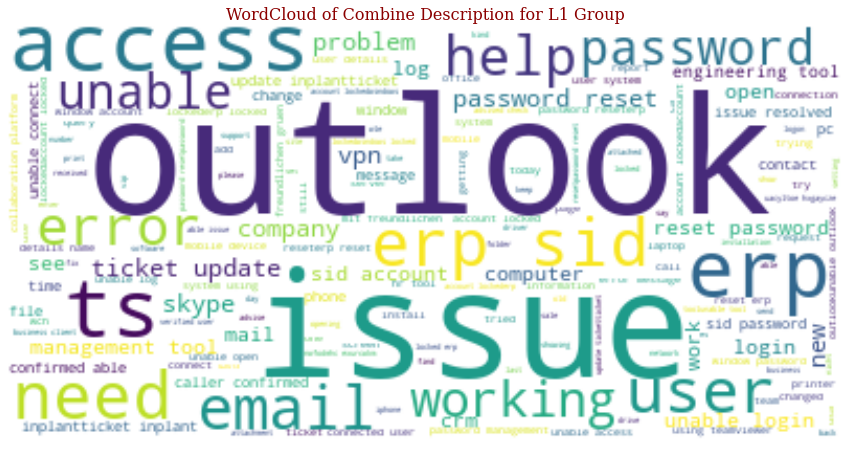

In [37]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
All_words = ""
All_words += " ".join(grp_0['Combine_Descrption'])
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Combine Description for L1 Group", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [38]:
grp_L2 = data[data["grp"] == 'L2']
grp_L2.head()

,group,caller,Combine_Descrption,grp,count_freq
17,GRP_3,Rep,undocking pc screen come backundocking back,L2,2
32,GRP_4,Rep,duplication network addressgentles two devices...,L2,6
43,GRP_5,Rep,please reroute job printer issue need resolved...,L2,2
47,GRP_6,Rep,job failed schedulerjob 1424 scheduler 09 06 00,L2,810
50,GRP_8,Rep,job mm zscr dly merktc failed schedulerjob zsc...,L2,810


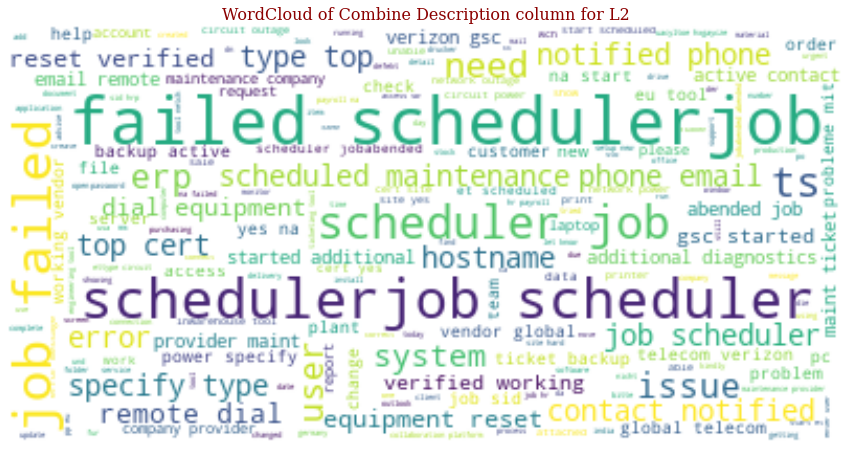

In [39]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
All_words = ""
All_words += " ".join(grp_L2['Combine_Descrption'])
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Combine Description column for L2", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [40]:
grp_L3 = data[data["grp"] == 'L3']
grp_L3.head()

,group,caller,Combine_Descrption,grp,count_freq
6,GRP_1,Rep,event critical hostname company com value moun...,L3,51
49,GRP_7,Rep,status change telephony softwareclosing call a...,L3,3
84,GRP_11,Rep,engineering tool drawing original pdf format s...,L3,2
141,GRP_15,Rep,channel partner receiving multiple email erp u...,L3,11
155,GRP_17,No,reset password hckvpary emxbpkwy using managem...,L3,1


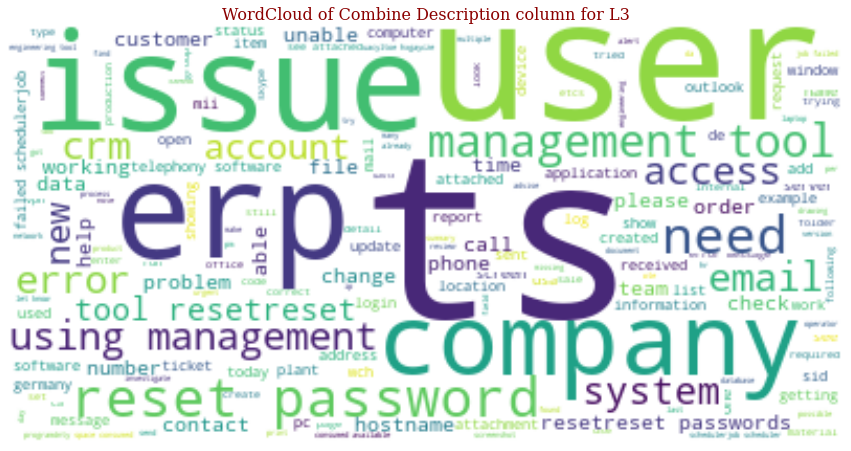

In [41]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
All_words = ""
All_words += " ".join(grp_L3['Combine_Descrption'])
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Combine Description column for L3", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [42]:
data.drop(columns = ['count_freq'], axis = 1,inplace=True)
data.head()

,group,caller,Combine_Descrption,grp
0,GRP_0,No,login issueverified user details name checked ...,L1
1,GRP_0,Rep,outlookteam skype appearing outlook calendar s...,L1
2,GRP_0,Rep,cant log vpnlog vpn,L1
3,GRP_0,Rep,unable access hr tool pageunable page,L1
4,GRP_0,Rep,skype errorskype error,L1


#### Data pre-processing 

In [43]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data["Label_grp"] = le.fit_transform(data["grp"])
y_classes_len = len(le.classes_)
le.classes_
print(y_classes_len)

3


In [44]:

data['caller']=np.where(data['caller']=='Rep', 1, 0)

In [45]:
data.head()

,group,caller,Combine_Descrption,grp,Label_grp
0,GRP_0,0,login issueverified user details name checked ...,L1,0
1,GRP_0,1,outlookteam skype appearing outlook calendar s...,L1,0
2,GRP_0,1,cant log vpnlog vpn,L1,0
3,GRP_0,1,unable access hr tool pageunable page,L1,0
4,GRP_0,1,skype errorskype error,L1,0


In [46]:
data.drop(columns = ['group','grp'], axis = 1,inplace=True)
data.head()

,caller,Combine_Descrption,Label_grp
0,0,login issueverified user details name checked ...,0
1,1,outlookteam skype appearing outlook calendar s...,0
2,1,cant log vpnlog vpn,0
3,1,unable access hr tool pageunable page,0
4,1,skype errorskype error,0


In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
def mytokenizer(x):
    return [y for y in x.split() if len(y) > 2]

In [49]:
vec = CountVectorizer(tokenizer=mytokenizer, min_df=0.005)
X = vec.fit_transform(data['Combine_Descrption'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())


In [50]:
s1 = pd.Series(data['Label_grp'], name="Label_grp")
s2= pd.Series(data['caller'], name="caller")

In [51]:
df1=df.reset_index(drop=True)
s3=s1.reset_index(drop=True)
s4=s2.reset_index(drop=True)

In [52]:
result = pd.concat([df1, s3,s4], axis=1)

In [53]:
result.head()

,100,2016,abended,able,access,account,accounts,action,active,add,added,additional,address,admin,advise,advised,aerp,agent,alert,alerts,already,also,another,apac,app,application,approved,assign,assist,attach,attached,attachment,audio,auf,authorized,automatically,available,back,backup,bei,...,update,updated,urgent,usa,use,used,user,users,using,vendor,verified,verizon,version,via,view,vip,volume,von,vpn,want,warehouse,warning,wch,web,website,week,well,wifi,window,windows,without,wle,work,working,would,wrong,yes,yesterday,Label_grp,caller
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
result = result.loc[:,~result.columns.duplicated()]

In [55]:
result.head()

,100,2016,abended,able,access,account,accounts,action,active,add,added,additional,address,admin,advise,advised,aerp,agent,alert,alerts,already,also,another,apac,app,application,approved,assign,assist,attach,attached,attachment,audio,auf,authorized,automatically,available,back,backup,bei,...,unlocked,update,updated,urgent,usa,use,used,user,users,using,vendor,verified,verizon,version,via,view,vip,volume,von,vpn,want,warehouse,warning,wch,web,website,week,well,wifi,window,windows,without,wle,work,working,would,wrong,yes,yesterday,Label_grp
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
#creating a copy of the train data and seperating the target column and the predictor variables

X=result.drop(['Label_grp'],axis=1)
y=result['Label_grp']

In [57]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [58]:
# splitting data training dataset into train and test set for independent attributes
X_train, X_test, Y_train, Y_test =train_test_split(X,y, test_size=.30,random_state=105)

In [ ]:
# Initializaing various classification algorithms with normal dataset and choosing the best model based on f1 score for tuning

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear',probability=True)))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold,scoring='roc_auc_ovo')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 83.182761% (1.850492%)
KNN: 78.311359% (1.534755%)
GNB: 75.826774% (1.493566%)
SVM: 79.514654% (1.382311%)
DT: 72.430768% (1.558292%)
RF: 85.339069% (1.397159%)
GBT: 83.921417% (1.622201%)
XGB: 83.225718% (0.806348%)
LightGBM: 85.068096% (1.339658%)


#### LightGBM with RandomsearchCV

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [ ]:
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'scale_pos_weight':[1,2,6,12]}

sample = 100

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 2000 define only the absolute maximum
lgb = LGBMClassifier(max_depth=-1, random_state=31, silent=True, metric='multi_logloss', n_jobs=4, n_estimators=2000)
gs = RandomizedSearchCV(
    estimator=lgb, param_distributions=param_test, 
    n_iter=sample,
    cv=5,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(X_train, Y_train)
gs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 30.8min finished


{'colsample_bytree': 0.8914513227485243,
 'min_child_samples': 117,
 'min_child_weight': 0.01,
 'num_leaves': 7,
 'reg_alpha': 0.1,
 'reg_lambda': 5,
 'scale_pos_weight': 6,
 'subsample': 0.5804609677502011}

In [ ]:
lgb=LGBMClassifier(colsample_bytree= 0.8914513227485243,
 min_child_samples= 117,
 min_child_weight= 0.01,
 num_leaves=7,
 reg_alpha= 0.1,
 reg_lambda= 5,
 scale_pos_weight= 6,
 subsample= 0.5804609677502011)
lgb.fit(X_train,Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.8914513227485243, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=117,
               min_child_weight=0.01, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=7, objective=None, random_state=None,
               reg_alpha=0.1, reg_lambda=5, scale_pos_weight=6, silent=True,
               subsample=0.5804609677502011, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
modellgb1=lgb.score(X_train,Y_train)
print('Accuracy Score of Training Data: ', modellgb1)

Accuracy Score of Training Data:  0.7250894225855902


In [ ]:
y_predictlg1= lgb.predict(X_test)
modellg1 = accuracy_score(Y_test, y_predictlg1)
print('Accuracy Score of Test Data:', modellg1)

Accuracy Score of Test Data: 0.6972586412395709


In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictlg1, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.87      0.77      1157
           1       0.73      0.68      0.70      1049
           2       0.56      0.12      0.20       311

    accuracy                           0.70      2517
   macro avg       0.66      0.56      0.55      2517
weighted avg       0.69      0.70      0.67      2517



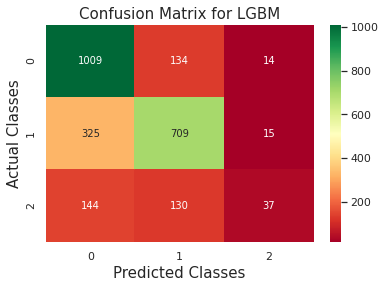

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictlg1)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for LGBM', fontsize = 15);

#### Random forest with RandomsearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = range(2,100,5)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,100,10)
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':['gini','entropy']}

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=90, n_jobs = -1)
rf_random.fit(X_train, Y_train)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.7min finished


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 82,
 'n_estimators': 463}

In [59]:
rf_grid1 = RandomForestClassifier(n_estimators=463,
 min_samples_split= 82,
 min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth= 110,
 criterion= 'gini',
 bootstrap= False)
rf_grid1.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=110, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=82,
                       min_weight_fraction_leaf=0.0, n_estimators=463,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
modelrfg1_score=rf_grid1.score(X_train,Y_train)
print('Accuracy Score of Training Data: ', modelrfg1_score)

Accuracy Score of Training Data:  0.8519843297564299


In [61]:
y_predictrfg1= rf_grid1.predict(X_test)
modelrfg1_score = accuracy_score(Y_test, y_predictrfg1)
print('Accuracy Score of Test Data:', modelrfg1_score)

Accuracy Score of Test Data: 0.7604290822407628


In [62]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictrfg1, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1157
           1       0.77      0.79      0.78      1049
           2       0.69      0.14      0.23       311

    accuracy                           0.76      2517
   macro avg       0.74      0.61      0.61      2517
weighted avg       0.75      0.76      0.73      2517



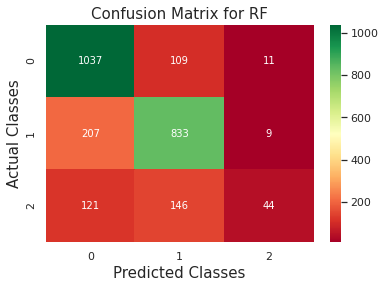

In [63]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictrfg1)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for RF', fontsize = 15);

#### XGBoost with RandomsearchCV

In [ ]:
xgb_para = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
            "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
            "min_child_weight" : [ 1, 3, 5, 7 ],
            "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
           }

xgb = XGBClassifier()
xgb_hy = RandomizedSearchCV(estimator = xgb, param_distributions = xgb_para, cv = 5, verbose=2, random_state=25, n_jobs = -1)
xgb_hy.fit(X_train, Y_train)
xgb_hy.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.8min finished


{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 1}

In [ ]:
xgb=XGBClassifier(min_child_weight=1,
 max_depth=6,
 learning_rate= 0.2,
 gamma= 0,
 colsample_bytree=0.7)
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
modelxgb_score=xgb.score(X_train,Y_train)
print('Accuracy Score of Training Data: ', modelxgb_score)

Accuracy Score of Training Data:  0.8492590700051099


In [ ]:
y_predictxg= xgb.predict(X_test)
modelxg_score = accuracy_score(Y_test, y_predictxg)
print('Accuracy Score of Test Data:', modelxg_score)

Accuracy Score of Test Data: 0.7504966229638459


In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictxg, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.91      0.81      1157
           1       0.78      0.75      0.76      1049
           2       0.62      0.17      0.27       311

    accuracy                           0.75      2517
   macro avg       0.71      0.61      0.62      2517
weighted avg       0.74      0.75      0.73      2517



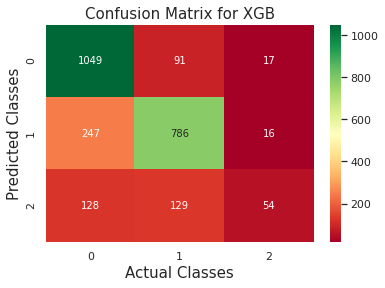

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictxg)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for XGB', fontsize = 15);

#### Based on the word cloud we do notice that there is bit of an overlap between group L1 and L3, hence collapsing the targets further into 2 classes

In [ ]:
def get_cat1(GRP):

    if GRP in [1]:
        return 1
    
    else:
        return 0

In [ ]:
dd=data.copy()

In [ ]:
dd['Label_grp'] = dd['Label_grp'].apply(get_cat1)

In [ ]:
dd['Label_grp'].value_counts(normalize=True) * 100

0    59.513591
1    40.486409
Name: Label_grp, dtype: float64

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
dd.head()

,caller,Combine_Descrption,Label_grp
0,0,login issueverified user details name checked ...,0
1,1,outlookteam skype appearing outlook calendar s...,0
2,1,cant log vpnlog vpn,0
3,1,unable access hr tool pageunable page,0
4,1,skype errorskype error,0


In [ ]:
vec = CountVectorizer(tokenizer=mytokenizer, min_df=0.005)
X = vec.fit_transform(dd['Combine_Descrption'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [ ]:
s1 = pd.Series(dd['Label_grp'], name="Label_grp")
s2= pd.Series(dd['caller'], name="caller")

In [ ]:
df1=df.reset_index(drop=True)
s3=s1.reset_index(drop=True)
s4=s2.reset_index(drop=True)

In [ ]:
result = pd.concat([df1, s3,s4], axis=1)

In [ ]:
result.head()

,100,2016,abended,able,access,account,accounts,action,active,add,added,additional,address,admin,advise,advised,aerp,agent,alert,alerts,already,also,another,apac,app,application,approved,assign,assist,attach,attached,attachment,audio,auf,authorized,automatically,available,back,backup,bei,...,update,updated,urgent,usa,use,used,user,users,using,vendor,verified,verizon,version,via,view,vip,volume,von,vpn,want,warehouse,warning,wch,web,website,week,well,wifi,window,windows,without,wle,work,working,would,wrong,yes,yesterday,Label_grp,caller
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
result = result.loc[:,~result.columns.duplicated()]

In [ ]:
result.head()

,100,2016,abended,able,access,account,accounts,action,active,add,added,additional,address,admin,advise,advised,aerp,agent,alert,alerts,already,also,another,apac,app,application,approved,assign,assist,attach,attached,attachment,audio,auf,authorized,automatically,available,back,backup,bei,...,unlocked,update,updated,urgent,usa,use,used,user,users,using,vendor,verified,verizon,version,via,view,vip,volume,von,vpn,want,warehouse,warning,wch,web,website,week,well,wifi,window,windows,without,wle,work,working,would,wrong,yes,yesterday,Label_grp
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#creating a copy of the train data and seperating the target column and the predictor variables

X=result.drop(['Label_grp'],axis=1)
y=result['Label_grp']

In [ ]:
# splitting data training dataset into train and test set for independent attributes
X_train, X_test, Y_train, Y_test =train_test_split(X,y, test_size=.30,random_state=12)

In [ ]:
# Initializaing various classification algorithms with normal dataset and choosing the best model based on f1 score for tuning

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear',probability=True)))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 88.399319% (1.607964%)
KNN: 85.319280% (1.495489%)
GNB: 85.348661% (1.384274%)
SVM: 86.620863% (1.560814%)
DT: 78.216514% (2.402889%)
RF: 90.105860% (0.947604%)
GBT: 88.419039% (1.020899%)
XGB: 88.105970% (0.875117%)
LightGBM: 89.892463% (1.600466%)


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = range(2,100,5)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,100,10)
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':['gini','entropy']}

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=90, n_jobs = -1)
rf_random.fit(X_train, Y_train)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.7min finished


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 82,
 'n_estimators': 463}

In [ ]:
rf_grid1 = RandomForestClassifier(n_estimators=463,
 min_samples_split= 82,
 min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth= 110,
 criterion= 'gini',
 bootstrap= False)
rf_grid1.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=110, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=82,
                       min_weight_fraction_leaf=0.0, n_estimators=463,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
modelrfg1_score=rf_grid1.score(X_train,Y_train)
print('Accuracy Score of Training Data: ', modelrfg1_score)

Accuracy Score of Training Data:  0.9039345937659683


In [ ]:
y_predictrfg1= rf_grid1.predict(X_test)
modelrfg1_score = accuracy_score(Y_test, y_predictrfg1)
print('Accuracy Score of Test Data:', modelrfg1_score)

Accuracy Score of Test Data: 0.8247914183551848


In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictrfg1, labels=[0,1]))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1507
           1       0.80      0.75      0.77      1010

    accuracy                           0.82      2517
   macro avg       0.82      0.81      0.82      2517
weighted avg       0.82      0.82      0.82      2517



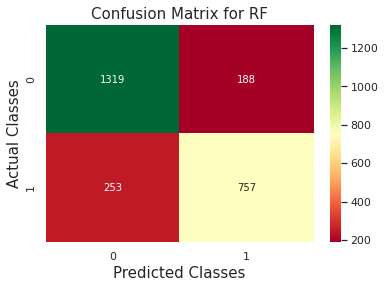

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictrfg1)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for RF', fontsize = 15);

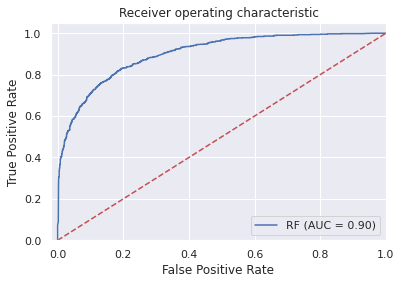

In [ ]:
#Plotting ROC and AUC
probs = rf_grid1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

          fpr       tpr     1-fpr        tf  threshold
373  0.182482  0.816832  0.817518 -0.000687   0.414848


In [ ]:
# store the predicted probabilities  for failed class 
y_pred_prob = rf_grid1.predict_proba(X_test)[:, 1]
# predict fail if the predicted probability is greater than 0.43
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.41)[0]

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[0, 1]))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1507
           1       0.75      0.82      0.78      1010

    accuracy                           0.82      2517
   macro avg       0.81      0.82      0.81      2517
weighted avg       0.82      0.82      0.82      2517



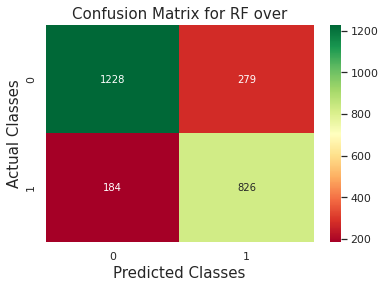

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for RF', fontsize = 15);

- Conclusion:
  The best performing model when we consider 3 or 2 unique groups appears to be Random forest based on test accuracy